# Penguins 
<span style="font-size:80px">&#128039;&#128039;&#128039; </span>
<p style="font-size:20px">Welcome to my penguin classification project! This work explores a fascinating dataset of size measurements and categorical features of three penguin species - Adélie, Gentoo, and Chinstrap observed on three islands in the Palmer Archipelago, Antarctica. Originally collected from 2007–2009 by Dr. Kristen Gorman as part of the Palmer Station Long Term Ecological Research Program, the data contains vital biological metrics like bill and flipper length, and body mass.</p>

<p style="font-size:20px">Building upon this foundational work, I used an extended version of the dataset that adds new, realistic features for a richer analysis. This expanded dataset includes a larger sample and additional variables such as diet, life stage, and health metrics, covering more recent observations from 2021 to 2025. These enhancements provide a more comprehensive view of penguin biology and their environment, offering fresh insights into these remarkable birds. &#128039;</p>

<p style="font-size:20px">Through exploratory data analysis, preprocessing, feature engineering and machine learning, this project aims to classify penguin species while demonstrating the power of combining data science with ecological research. Whether you are here for the penguins or analytics, I hope you find this project as engaging and enjoyable as I did! &#x1F60D;</p>


In [1]:
from IPython.display import HTML

HTML(f"""
    <div class="row">
        <img src={"penguins-poem2.jpg"} style="width:45%"/>
        <img src={"penguins2.webp"} style="width:50%"/>
    </div>
    """)

# Table Of Contents

<font size="5"> 1. [Import Libraries](#1.-Import-Libraries) </font> </br>

<font size="5"> 2. [Load Data](#2.-Load-Data) </font> </br>

<font size="5"> 3. [EDA](#3.-EDA) </font> </br>

<font size="5"> 4. [Data Preprocessing](#4.-Data-Preprocessing) </font> </br>

<font size="5"> 5. [ML](#5.-ML) </font> </br>

<font size="5">   ... </font> </br>

<font size="5"> 7. [Compare Models](#6.-Compare-Models) </font> </br>

<font size="5"> 8. [Conclusion](#7.-Conclusion) </font> </br>

## 1. Import Libraries
[Back to Top](#Penguins) <br>

In [2]:
# # run this cell only once to install any libraries we might not have yet, comment after the first run
# ! pip install jupyternotify
# %load_ext jupyternotify
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install scikit-learn

In [3]:
import numpy as np

import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

### Set commonly used colors

In [4]:
island_colors = ['#FF77FF', '#FFE600', '#00FFFE']
gender_colors = ['#F8C8DC', '#6495ED']
species_colors = ['#66B2B2', '#FFB732', '#AE5DAE']
species_order = ['Adelie', 'Chinstrap', 'Gentoo']

## 2. Load Data
[Back to Top](#Penguins) <br>

In [5]:
# # run this cell only once to download the data, comment after the first run
# ! kaggle datasets list -s 'penguin'
# ! kaggle datasets download -d 'samybaladram/palmers-penguin-dataset-extended'
# ! unzip 'palmers-penguin-dataset-extended.zip' -d data/
# ! rm 'palmers-penguin-dataset-extended.zip'
df = pd.read_csv('data/palmerpenguins_extended.csv').sort_values(['year', 'island', 'species', 'sex', 'diet', 'life_stage', 'health_metrics'])

## 3. EDA
[Back to Top](#Penguins) <br>

### Common functions for EDA

In [6]:
def set_bar_labels(axis_name, padding=0):
    '''set bar value labels for 1 graph'''
    for i in axis_name.containers:
        axis_name.bar_label(i, padding=padding)

def set_grid(axis):
    '''define a nice grid for 1 graph'''
    axis.grid(False)
    axis.grid(which='major', axis='y', linewidth=0.2, color='grey')

### Descriptive Statistics

In [7]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
6,Adelie,Biscoe,61.0,20.8,211.0,5961.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
5,Adelie,Biscoe,35.7,16.8,194.0,5266.0,female,fish,juvenile,overweight,2021
18,Adelie,Biscoe,28.5,17.4,169.0,3810.0,female,krill,juvenile,healthy,2021
13,Adelie,Biscoe,20.4,16.9,166.0,3431.0,female,krill,juvenile,underweight,2021
14,Adelie,Biscoe,20.4,14.9,188.0,3672.0,female,krill,juvenile,underweight,2021


In [8]:
# count of rows and columns
df.shape

(3430, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3430 entries, 0 to 2966
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 321.6+ KB


In [10]:
# How many null values are in each column?
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

In [11]:
df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe().round(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3430.0,3430.0,3430.0,3430.0
mean,38.5,18.4,207.0,4834.7
std,13.2,2.8,28.9,1311.1
min,13.6,9.1,140.0,2477.0
25%,28.9,16.6,185.0,3843.5
50%,34.5,18.4,203.0,4633.5
75%,46.6,20.3,226.0,5622.0
max,88.2,27.9,308.0,10549.0


In [12]:
# Frequency Table
columns = ['island', 'species', 'sex', 'diet', 'life_stage', 'health_metrics']
df[columns].value_counts().reset_index(name='count').sort_values(columns).reset_index(drop=True)

,island,species,sex,diet,life_stage,health_metrics,count
0,Biscoe,Adelie,female,fish,adult,healthy,5
1,Biscoe,Adelie,female,fish,adult,overweight,35
2,Biscoe,Adelie,female,fish,adult,underweight,1
3,Biscoe,Adelie,female,fish,juvenile,healthy,1
4,Biscoe,Adelie,female,fish,juvenile,overweight,48
...,...,...,...,...,...,...,...
173,Torgensen,Adelie,male,squid,adult,healthy,2
174,Torgensen,Adelie,male,squid,adult,overweight,6
175,Torgensen,Adelie,male,squid,adult,underweight,2
176,Torgensen,Adelie,male,squid,juvenile,healthy,5


#### Penguin counts for each species

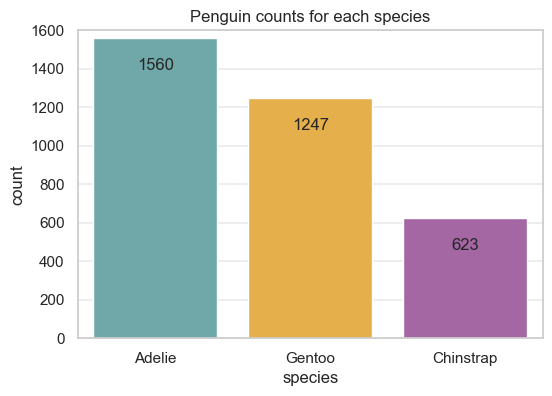

In [13]:
graph = sns.countplot(df, x='species', hue='species', palette=species_colors)
plt.title('Penguin counts for each species')
plt.ylim(0, 1600)
set_grid(plt)
set_bar_labels(graph, padding=-25)
plt.show()

#### Penguin counts for each island

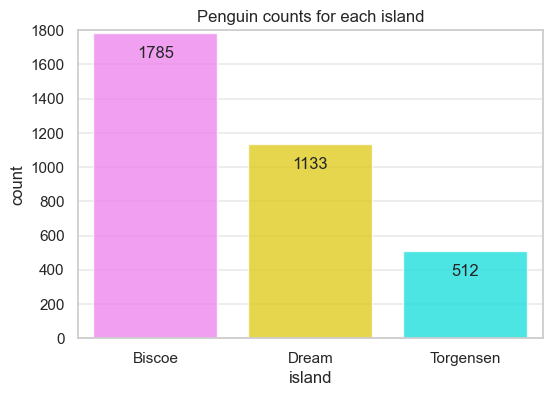

In [14]:
graph = sns.countplot(df, x='island', hue='island', palette=island_colors, alpha=0.8)
plt.title('Penguin counts for each island')
plt.ylim(0, 1800)
plt.yticks(range(0, 2000, 200))
set_grid(plt)
set_bar_labels(graph, padding=-20)
plt.show()

#### Penguin counts for each year

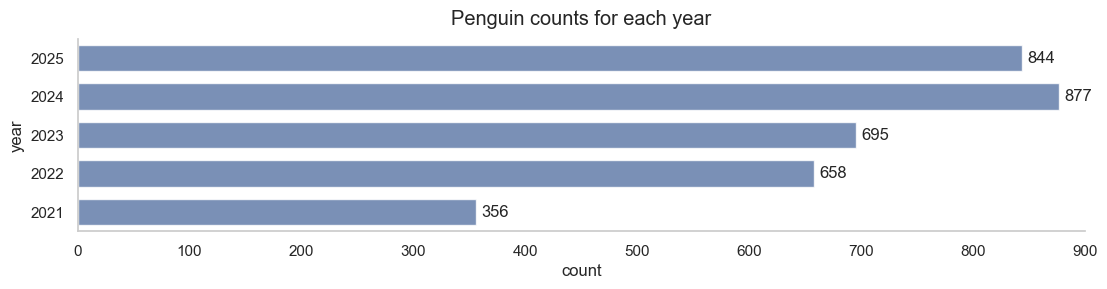

In [15]:
years = df['year'].unique()
years_order = np.sort(years)[::-1]

plt.figure(figsize=(13, 2.5))
graph = sns.countplot(df, y='year', order=years_order, width=0.7, alpha=0.8)
plt.title('Penguin counts for each year', size='large', y=1.03)
plt.xlim(0, 900)
plt.xticks(range(0, 1000, 100))
plt.grid(False)
sns.despine()
set_bar_labels(graph, padding=4)
plt.show()

#### Penguin counts for each life stage

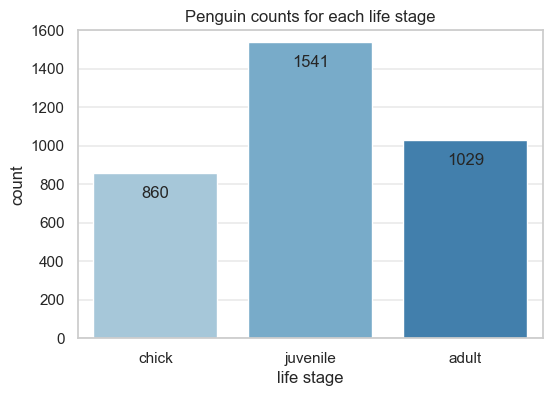

In [16]:
life_stage_order = ['chick', 'juvenile', 'adult']
graph = sns.countplot(df, x='life_stage', hue='life_stage', order=life_stage_order, palette='tab20c')
plt.title('Penguin counts for each life stage')
plt.ylim(0, 1600)
plt.xlabel('life stage')
set_grid(plt)
set_bar_labels(graph, padding=-20)
plt.show()

#### Penguin counts for each type of diet

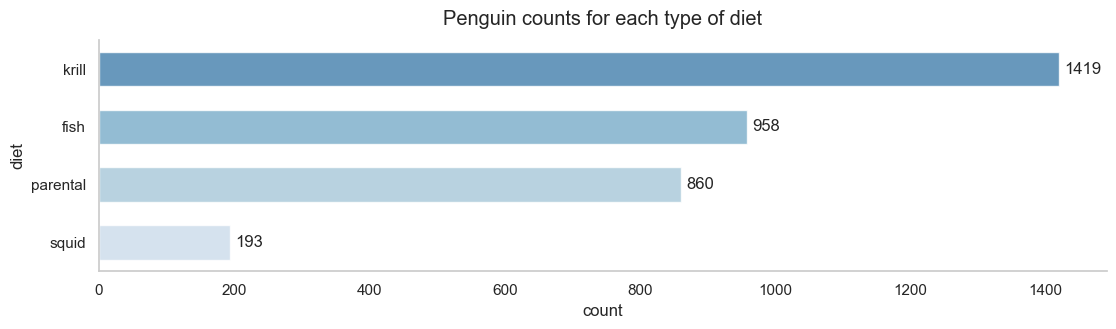

In [17]:
diet_order = df['diet'].value_counts().index
plt.figure(figsize=(13, 3))
graph = sns.countplot(df, y='diet', hue='diet', palette='tab20c', order=diet_order, hue_order=diet_order, width=0.6, alpha=0.8)
plt.title('Penguin counts for each type of diet', size='large', y=1.03)
plt.grid(False)
sns.despine()
set_bar_labels(graph, padding=4)
plt.show()

#### Penguin counts for each health metric

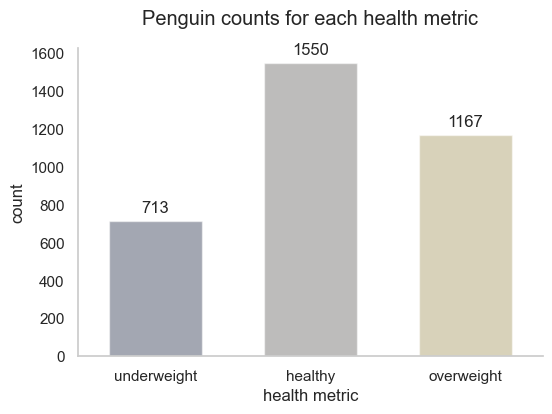

In [18]:
health_metric_order = ['underweight', 'healthy', 'overweight']
graph = sns.countplot(df, x='health_metrics', hue='health_metrics', palette='cividis', 
                      order=health_metric_order, hue_order=health_metric_order, width=0.6, alpha=0.5)
plt.title('Penguin counts for each health metric', size='large', y=1.05)
plt.xlabel('health metric')
plt.grid(False)
sns.despine()
set_bar_labels(graph, padding=4)
plt.show()

### Univariate Analysis

#### Number of penguins of each species on each island

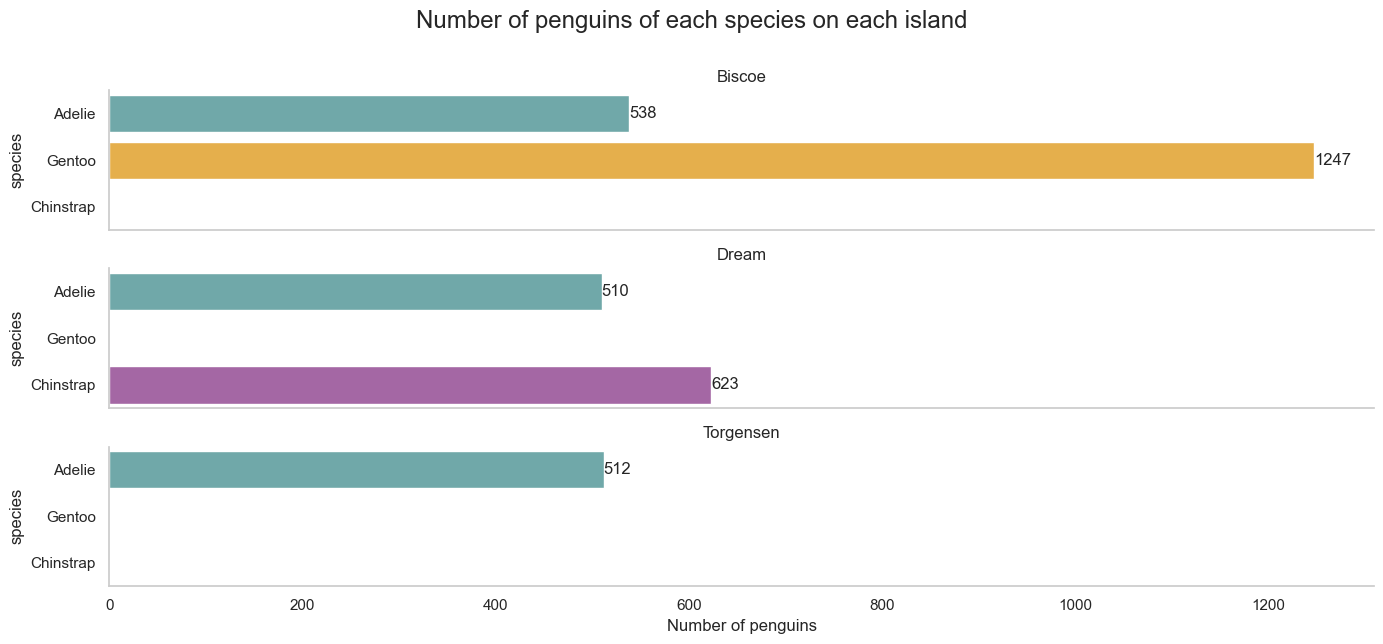

In [19]:
graph = sns.catplot(df, kind='count', y='species', hue='species', row='island', palette=species_colors, height=2, aspect=7)
plt.suptitle('Number of penguins of each species on each island', fontsize='x-large', y=1.07)
graph.set_xlabels('Number of penguins')

# make nicer headings for each sub-graph, set grid and add value labels for each bar
for ax in graph.axes.ravel():
    sub_graph_title = ax.title.get_text().replace('island = ', '')
    ax.set_title(sub_graph_title)
    ax.grid(False)
    set_bar_labels(ax)

plt.show()

#### Histograms of penguin's numerical measurements by species

##### Preparing data for plotting histograms: keep only the columns we need for the histograms

In [20]:
column_indices = [0] + list(range(2, 6, 1))
data_for_distributions = df.iloc[:, column_indices]

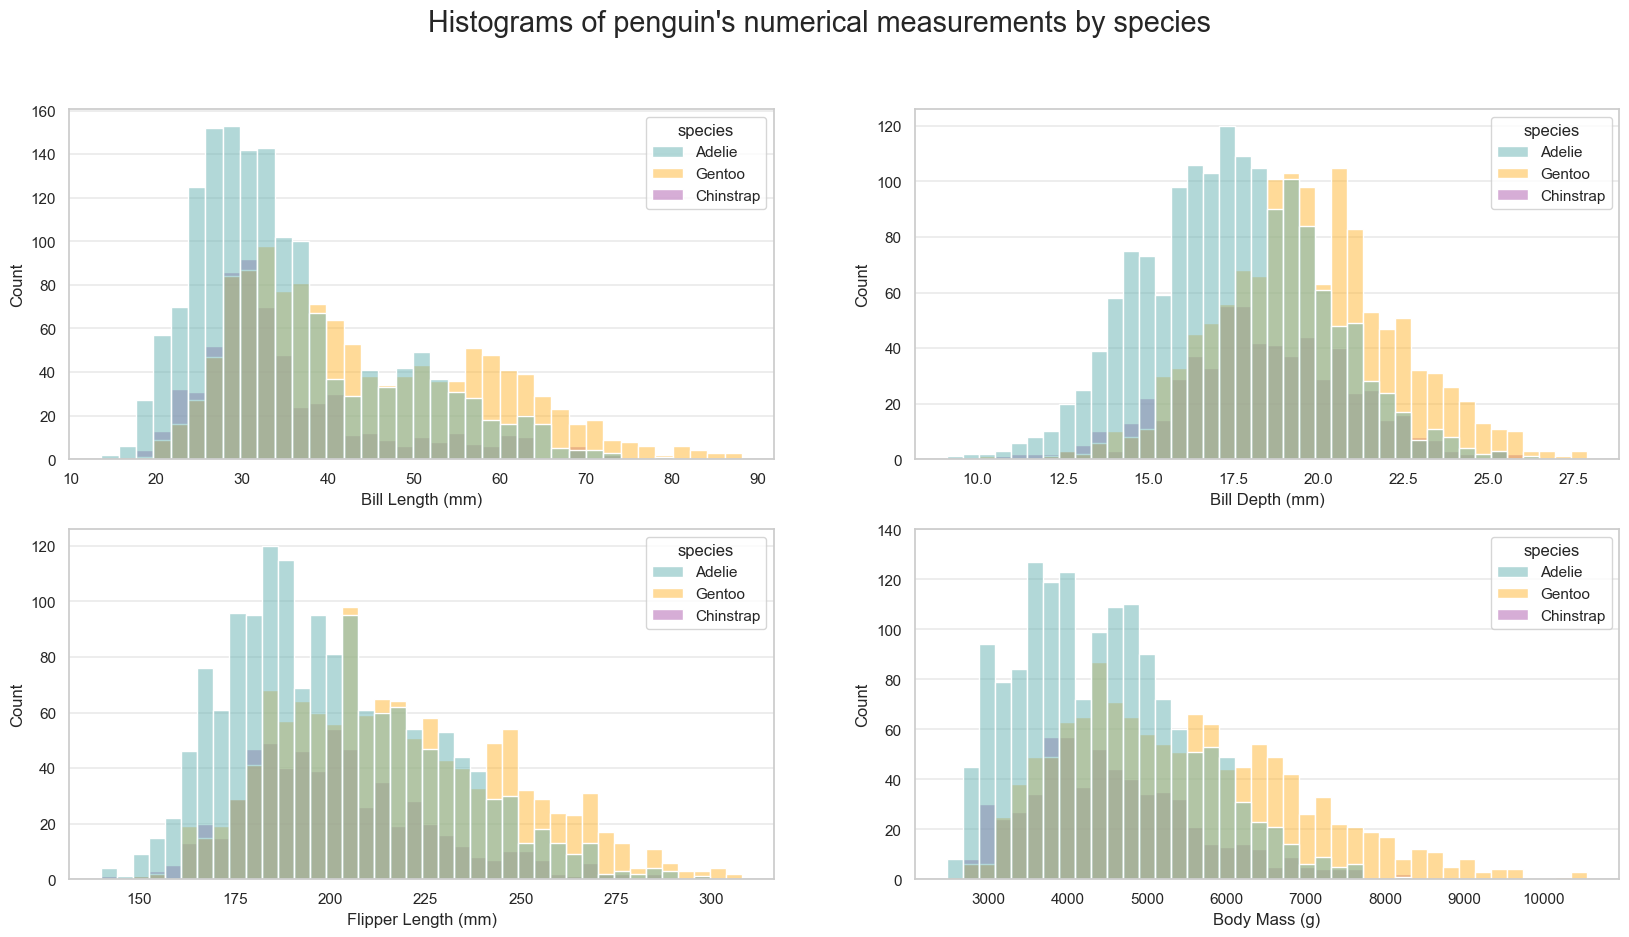

In [21]:
figure, axes = plt.subplots(2, 2, figsize=(20, 10)) 
figure.suptitle("Histograms of penguin's numerical measurements by species", fontsize='xx-large')

axes[0, 0].set_xlabel('Bill Length (mm)')
set_grid(axes[0, 0])
sns.histplot(data_for_distributions, x='bill_length_mm', hue='species', ax=axes[0, 0], palette=species_colors, binwidth=2)

axes[0, 1].set_xlabel('Bill Depth (mm)')
set_grid(axes[0, 1])
sns.histplot(data_for_distributions, x='bill_depth_mm', hue='species', ax=axes[0, 1], palette=species_colors, bins=40)

axes[1, 0].set_xlabel('Flipper Length (mm)')
set_grid(axes[1, 0])
sns.histplot(data_for_distributions, x='flipper_length_mm', hue='species', ax=axes[1, 0], palette=species_colors, bins=40)

axes[1, 1].set_xlabel('Body Mass (g)')
axes[1, 1].set_ylim(0, 140)
set_grid(axes[1, 1])
sns.histplot(data_for_distributions, x='body_mass_g', hue='species', ax=axes[1, 1], palette=species_colors, bins=40)

plt.show()

#### KDE plots of penguin's numerical measurements by island

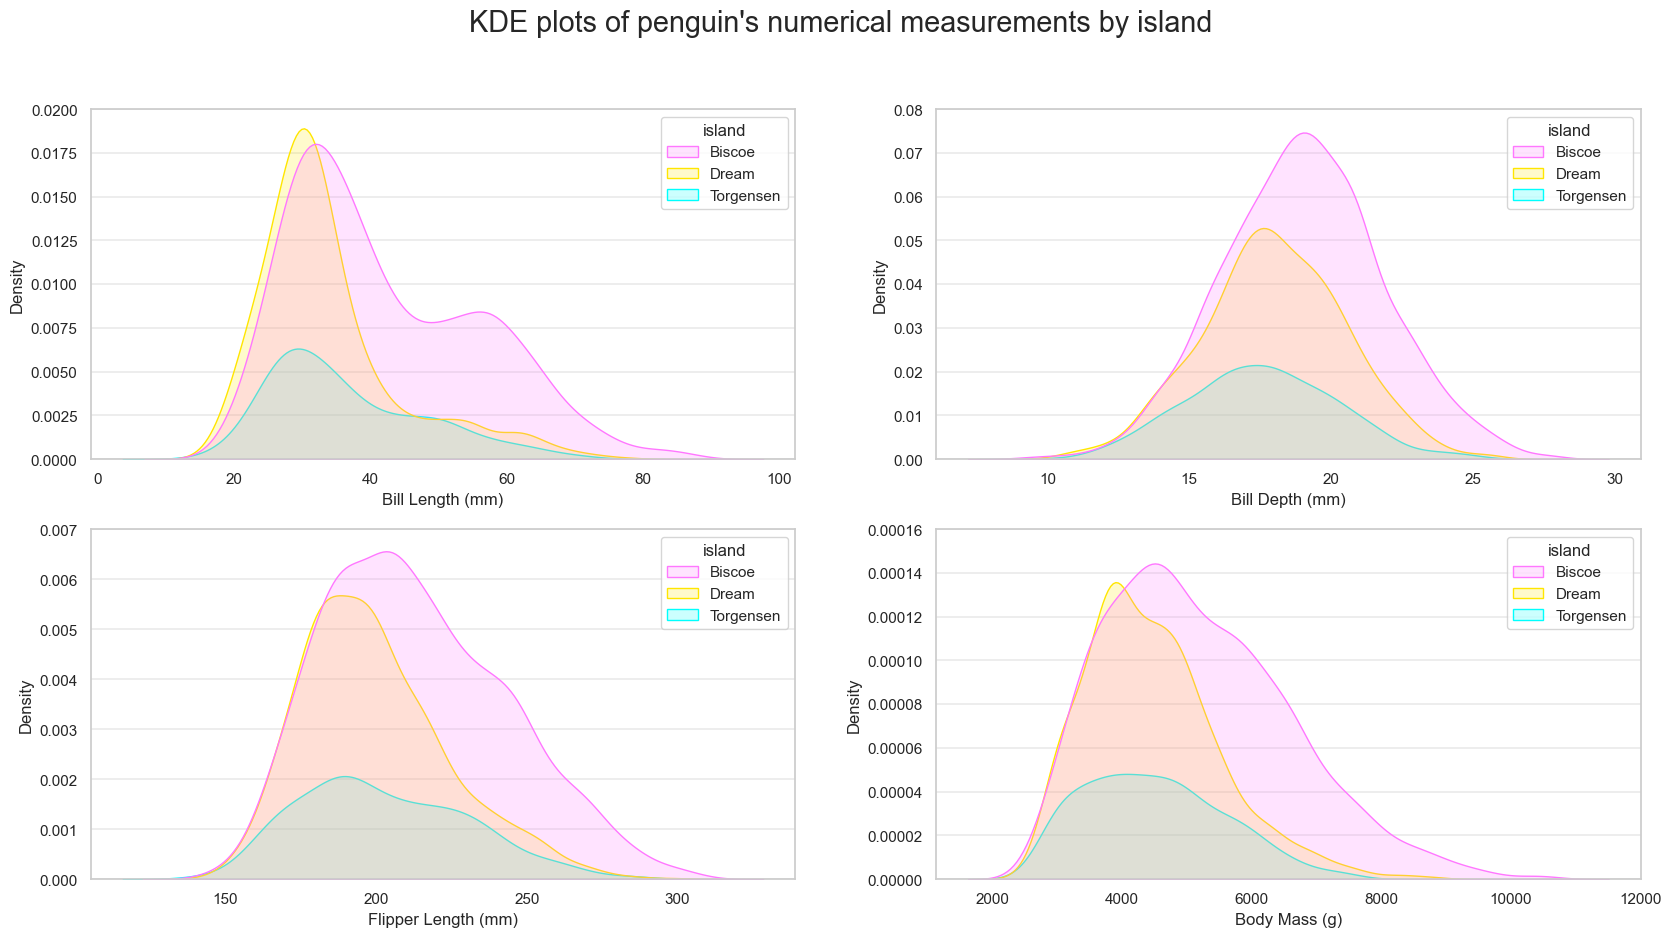

In [22]:
figure, axes = plt.subplots(2, 2, figsize=(20, 10))
figure.suptitle("KDE plots of penguin's numerical measurements by island", fontsize='xx-large')

axes[0, 0].set_xlabel('Bill Length (mm)')
axes[0, 0].set_ylim(0, 0.02)
set_grid(axes[0, 0])
sns.kdeplot(df, x='bill_length_mm', hue='island', ax=axes[0, 0], fill=True, palette=island_colors, linewidth=1, alpha=0.2)

axes[0, 1].set_xlabel('Bill Depth (mm)')
axes[0, 1].set_ylim(0, 0.08)
set_grid(axes[0, 1])
sns.kdeplot(df, x='bill_depth_mm', hue='island', ax=axes[0, 1], fill=True, palette=island_colors, linewidth=1, alpha=0.2)

axes[1, 0].set_xlabel('Flipper Length (mm)')
axes[1, 0].set_ylim(0, 0.007)
set_grid(axes[1, 0])
sns.kdeplot(df, x='flipper_length_mm', hue='island', ax=axes[1, 0], fill=True, palette=island_colors, linewidth=1, alpha=0.2)

axes[1, 1].set_xlabel('Body Mass (g)')
axes[1, 1].set_ylim(0, 0.00016)
set_grid(axes[1, 1])
sns.kdeplot(df, x='body_mass_g', hue='island', ax=axes[1, 1], fill=True, palette=island_colors, linewidth=1, alpha=0.2)

plt.show()

#### Boxen plots of penguin's scaled numerical measurements by species, by gender

##### Preparing data for boxen plots

In [23]:
columns = ['species', 'sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
wide_data = df[columns]

# Scale the measurements
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
wide_data.iloc[:, 2:] = sc.fit_transform(wide_data.iloc[:, 2:])

wide_data.columns = wide_data.columns.str.replace('_mm', '_scaled')
wide_data.rename(columns={'body_mass_g': 'body_mass_scaled'}, inplace=True)
columns = wide_data.columns

long_data = pd.melt(wide_data, id_vars=columns[0:2], value_vars=columns[2:], var_name='measurement_type', value_name='measurement')
long_data.sort_values(['species', 'sex'] , inplace=True)

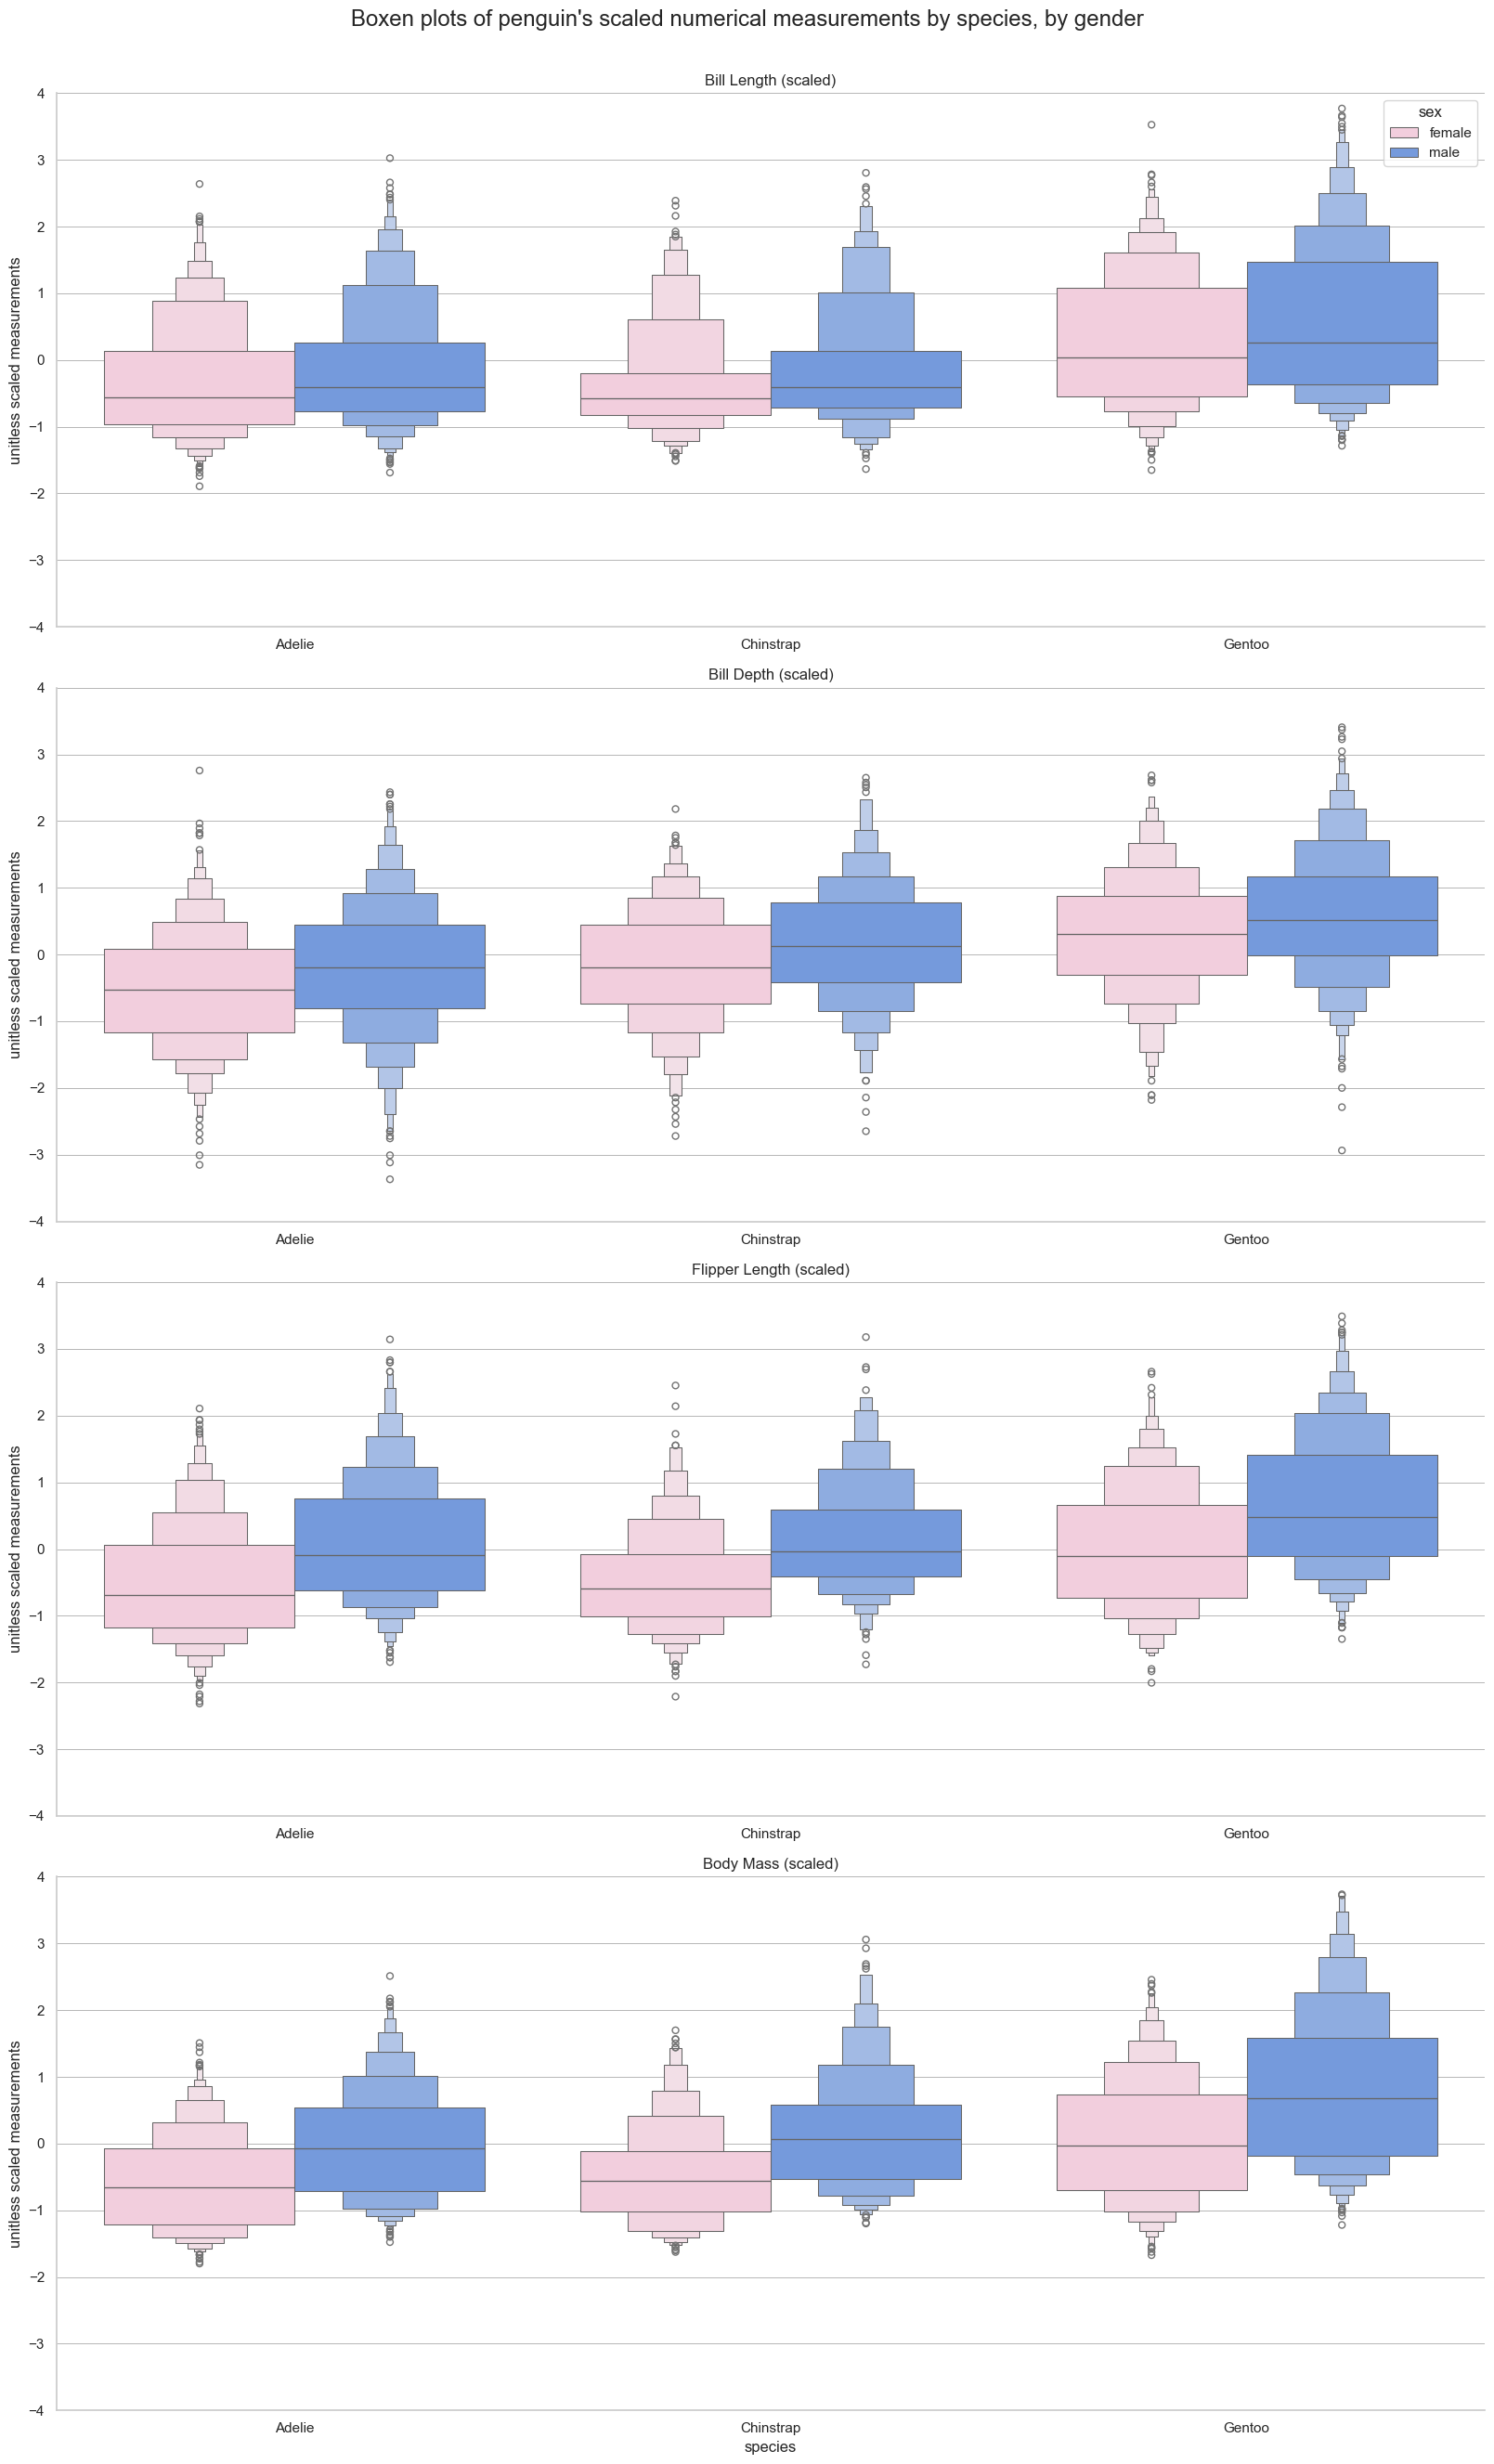

In [24]:
graph = sns.catplot(long_data, 
                    kind='boxen', 
                    x='species', 
                    y='measurement', 
                    row='measurement_type',
                    hue='sex', 
                    palette=gender_colors, 
                    height=6.5,
                    aspect=2.5, 
                    legend_out=False, 
                    sharey=True, 
                    sharex=False)
                    
plt.suptitle("Boxen plots of penguin's scaled numerical measurements by species, by gender", fontsize='x-large', y=1.02)
graph.set_xlabels('species')
graph.set_ylabels('unitless scaled measurements')

# make nicer headings for each sub-graph, set y limit and set grid
for ax in graph.axes.ravel():
    sub_graph_title = ax.title.get_text() \
                        .replace('measurement_type = ', '') \
                        .replace('_', ' ') \
                        .title() \
                        .replace('Scaled', '(scaled)')
    
    ax.set_title(sub_graph_title)
    ax.set_ylim(-4, 4)
    ax.grid(False)
    ax.grid(which='major', axis='y', linewidth=0.4, color='grey')

plt.show()

#### Gender proportions for each species

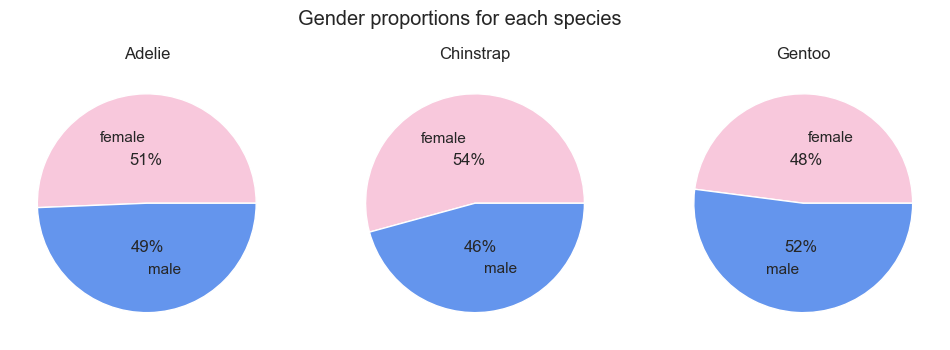

In [25]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(12, 4))
figure.suptitle('Gender proportions for each species')
species_sex_counts = df[['species', 'sex']].value_counts().reset_index(name='count').sort_values(by=['species', 'sex'])

Adelie = species_sex_counts[species_sex_counts['species'] == 'Adelie']
axes[0].set_title('Adelie')
axes[0].pie(Adelie['count'], labels=Adelie['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Chinstrap = species_sex_counts[species_sex_counts['species'] == 'Chinstrap']
axes[1].set_title('Chinstrap')
axes[1].pie(Chinstrap['count'], labels=Chinstrap['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Gentoo = species_sex_counts[species_sex_counts['species'] == 'Gentoo']
axes[2].set_title('Gentoo')
axes[2].pie(Gentoo['count'], labels=Gentoo['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

plt.show() 

#### Gender proportions for each island

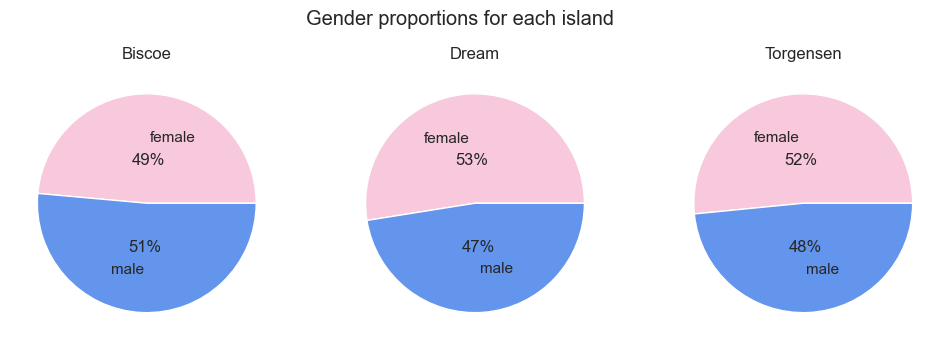

In [26]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(12, 4))
figure.suptitle('Gender proportions for each island')
island_sex_counts = df[['island', 'sex']].value_counts().reset_index(name='count').sort_values(by=['island', 'sex'])

Biscoe = island_sex_counts[island_sex_counts['island'] == 'Biscoe']
axes[0].set_title('Biscoe')
axes[0].pie(Biscoe['count'], labels=Biscoe['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Dream = island_sex_counts[island_sex_counts['island'] == 'Dream']
axes[1].set_title('Dream')
axes[1].pie(Dream['count'], labels=Dream['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Torgensen = island_sex_counts[island_sex_counts['island'] == 'Torgensen']
axes[2].set_title('Torgensen')
axes[2].pie(Torgensen['count'], labels=Torgensen['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

plt.show()

#### Annual evolution of penguin populations on each island

##### Two ways to calculate the annual evolution: using subplots and the catplot

##### Using subplots

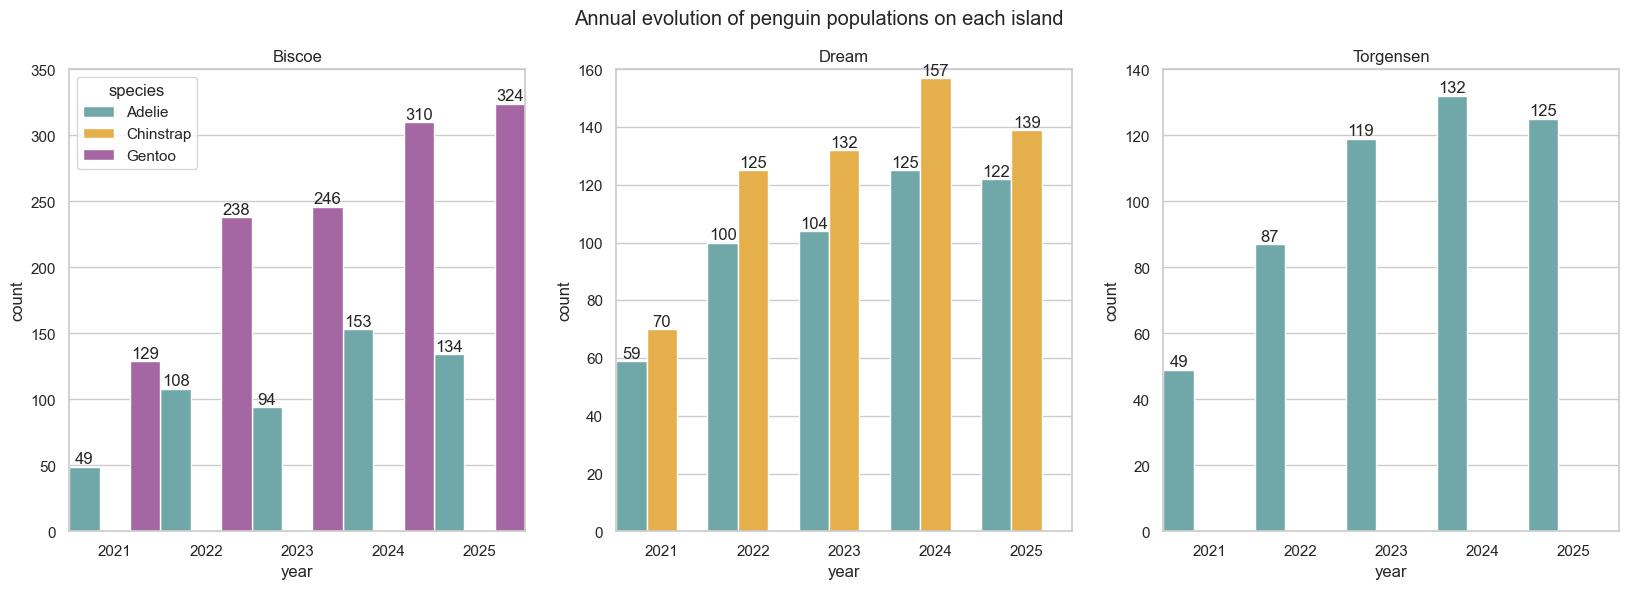

In [27]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(20, 6))
figure.suptitle('Annual evolution of penguin populations on each island')

axes[0].set_title('Biscoe')
axes[0].set_ylim(0, 350)
Biscoe = df[df['island'] == 'Biscoe']
sns.countplot(x='year', data=Biscoe, hue='species', ax=axes[0], palette=species_colors, hue_order=species_order, width=1, dodge=True)
set_bar_labels(axes[0])

axes[1].set_title('Dream')
axes[1].set_ylim(0, 160)
Dream = df[df['island'] == 'Dream']
sns.countplot(x='year', data=Dream, hue='species', ax=axes[1], palette=species_colors, hue_order=species_order, width=1, dodge=True, legend=False)
set_bar_labels(axes[1])

axes[2].set_title('Torgensen')
axes[2].set_ylim(0, 140)
Torgensen = df[df['island'] == 'Torgensen']
sns.countplot(x='year', data=Torgensen, hue='species', ax=axes[2], palette=species_colors, hue_order=species_order, width=1, dodge=True, legend=False)
set_bar_labels(axes[2])

plt.show()

##### Using the catplot

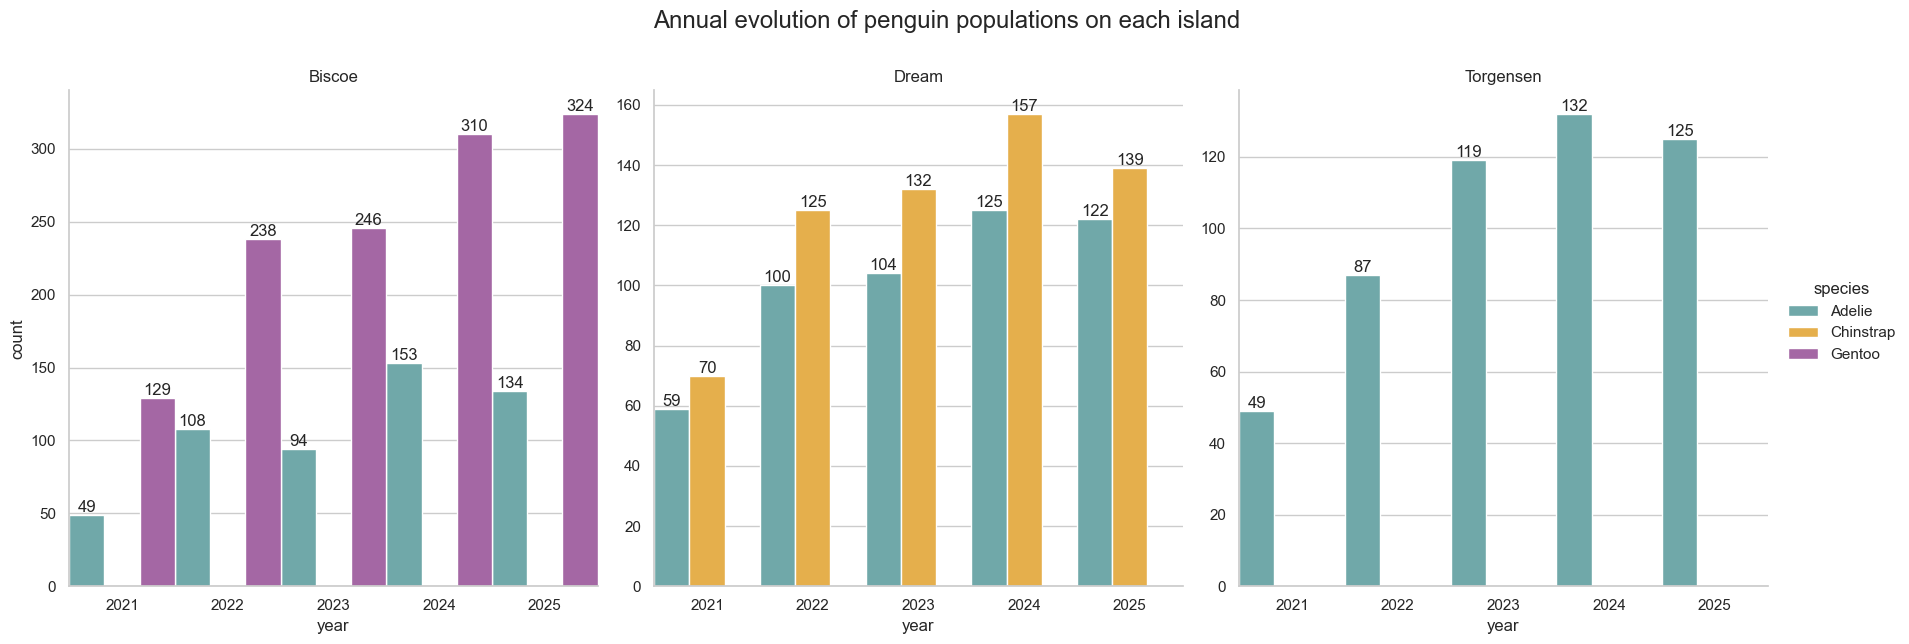

In [28]:
graph = sns.catplot(df, x='year', hue='species', col='island', kind='count', sharey=False,
                    palette=species_colors, hue_order=species_order, width=1, dodge=True, height=6)

plt.suptitle('Annual evolution of penguin populations on each island', size='x-large', y=1.07)

# set value labels on bars on every sub-graph
for ax in graph.axes.ravel():
    set_bar_labels(ax)
    sub_graph_title = ax.title.get_text().replace('island = ', '')
    ax.set_title(sub_graph_title)

plt.show()

#### What do different penguin species like to eat?

##### Preparing the data for the graph.

In [29]:
# Group by species and diet and calculate the size of each group
grouped_data = df.groupby(['species', 'diet']).size().reset_index(name='count')

# Calculate the total counts for each species
grouped_data['total'] = grouped_data.groupby('species')['count'].transform('sum')

# Calculate the proportions for each type of diet
grouped_data['proportion'] = grouped_data['count'] / grouped_data['total']
grouped_data['percentage'] = grouped_data['proportion']*100

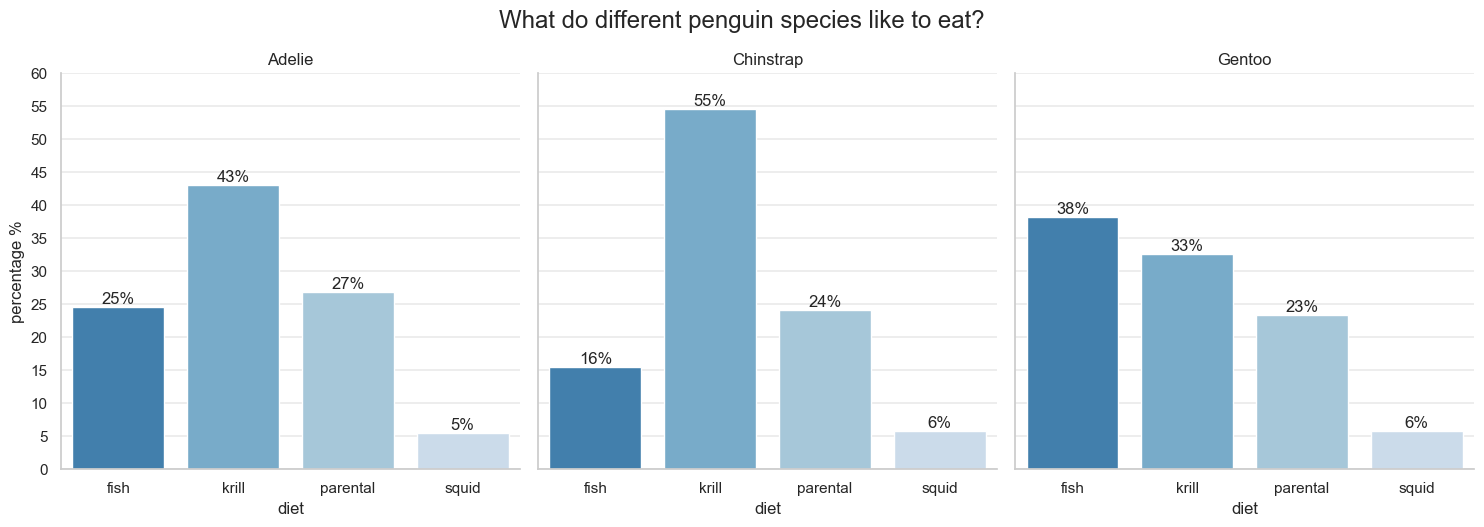

In [30]:
graph = sns.catplot(grouped_data, kind='bar', x='diet', y='percentage', col='species', hue='diet', palette='tab20c')
plt.suptitle('What do different penguin species like to eat?', size='x-large', y=1.05)
graph.set_ylabels('percentage %')

# make adjustments for sub-graphs: make nicer headings, set value labels on bars, make a nice grid, ...
for ax in graph.axes.ravel():
    sub_graph_title = ax.title.get_text().replace('species = ', '')
    ax.set_title(sub_graph_title)
    set_grid(ax)
    ax.set_ylim(0, 60)
    ax.set_yticks(range(0, 65, 5))
    
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}%' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
        
plt.show()

#### What type of food do penguins eat on each island?

##### We only look at primary external food sources, therefore parental is excluded.

##### Preparing the data for the graph.

In [31]:
grouped_data = df[df['diet'] != 'parental'] \
                .groupby(['island', 'diet']) \
                .size() \
                .reset_index(name='count') \

grouped_data['total'] = grouped_data.groupby('island')['count'].transform('sum')
grouped_data['proportion'] = grouped_data['count'] / grouped_data['total']
grouped_data['percentage'] = grouped_data['proportion']*100

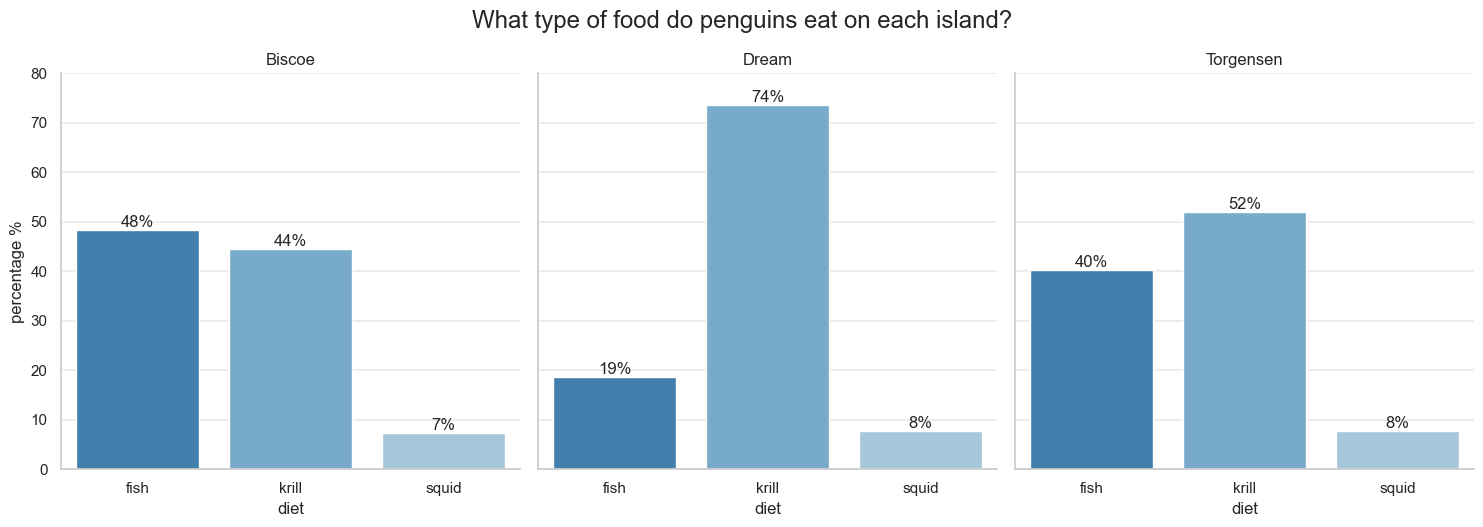

In [32]:
graph = sns.catplot(grouped_data, kind='bar', x='diet', y='percentage', col='island', hue='diet', palette='tab20c')
plt.suptitle('What type of food do penguins eat on each island?', size='x-large', y=1.05)
graph.set_ylabels('percentage %')

# make adjustments for sub-graphs: make nicer headings, set value labels on bars, make a nice grid, ...
for ax in graph.axes.ravel():
    sub_graph_title = ax.title.get_text().replace('island = ', '')
    ax.set_title(sub_graph_title)
    set_grid(ax)
    ax.set_ylim(0, 80)
    ax.set_yticks(range(0, 90, 10))
    
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}%' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
        
plt.show()

### Bivariate Analysis

## 4. Data Preprocessing
[Back to Top](#Penguins) <br>

## 5. ML
[Back to Top](#Penguins) <br>

## 6. Compare Models
[Back to Top](#Penguins) <br>

## 7. Conclusion
[Back to Top](#Penguins) <br>